In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

In [72]:
prices_1 = pd.read_csv('data/1/prices_round_1_day_-2.csv', delimiter=';').drop(columns=['day', 'profit_and_loss'])
prices_2 = pd.read_csv('data/1/prices_round_1_day_-1.csv', delimiter=';').drop(columns=['day', 'profit_and_loss'])
prices_3 = pd.read_csv('data/1/prices_round_1_day_0.csv', delimiter=';').drop(columns=['day', 'profit_and_loss'])

pa1 = prices_1[prices_1['product'] == 'AMETHYSTS'].set_index('timestamp', drop=True).drop(columns=['product'])
pa2 = prices_2[prices_2['product'] == 'AMETHYSTS'].set_index('timestamp', drop=True).drop(columns=['product'])
pa3 = prices_3[prices_3['product'] == 'AMETHYSTS'].set_index('timestamp', drop=True).drop(columns=['product'])

ps1 = prices_1[prices_1['product'] == 'STARFRUIT'].set_index('timestamp', drop=True).drop(columns=['product'])
ps2 = prices_2[prices_2['product'] == 'STARFRUIT'].set_index('timestamp', drop=True).drop(columns=['product'])
ps3 = prices_3[prices_3['product'] == 'STARFRUIT'].set_index('timestamp', drop=True).drop(columns=['product'])

In [93]:
trades_1 = pd.read_csv('data/1/trades_round_1_day_-2_nn.csv', delimiter=';').drop(columns=['buyer', 'seller', 'currency'])
trades_2 = pd.read_csv('data/1/trades_round_1_day_-1_nn.csv', delimiter=';').drop(columns=['buyer', 'seller', 'currency'])
trades_3 = pd.read_csv('data/1/trades_round_1_day_0_nn.csv', delimiter=';').drop(columns=['buyer', 'seller', 'currency'])

ta1 = trades_1[trades_1['symbol'] == 'AMETHYSTS'].set_index('timestamp', drop=True).drop(columns=['symbol'])
ta2 = trades_2[trades_2['symbol'] == 'AMETHYSTS'].set_index('timestamp', drop=True).drop(columns=['symbol'])
ta3 = trades_3[trades_3['symbol'] == 'AMETHYSTS'].set_index('timestamp', drop=True).drop(columns=['symbol'])

ts1 = trades_1[trades_1['symbol'] == 'STARFRUIT'].set_index('timestamp', drop=True).drop(columns=['symbol'])
ts2 = trades_2[trades_2['symbol'] == 'STARFRUIT'].set_index('timestamp', drop=True).drop(columns=['symbol'])
ts3 = trades_3[trades_3['symbol'] == 'STARFRUIT'].set_index('timestamp', drop=True).drop(columns=['symbol'])

# AMETHYSTS

In [110]:
pa1.isna().sum()

bid_price_1        0
bid_volume_1       0
bid_price_2     2543
bid_volume_2    2543
bid_price_3     8252
bid_volume_3    8252
ask_price_1        0
ask_volume_1       0
ask_price_2     2545
ask_volume_2    2545
ask_price_3     8253
ask_volume_3    8253
mid_price          0
dtype: int64

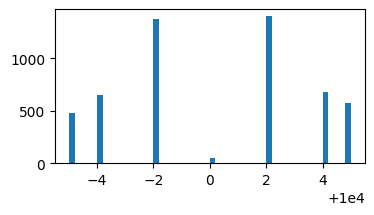

In [136]:
plt.figure(figsize=(4, 2))
plt.hist(ta1['price'], weights=ta1['quantity'], bins=50)
plt.show()

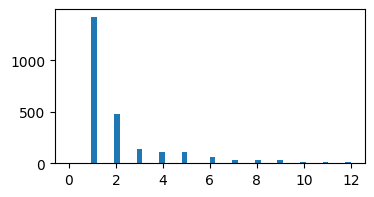

In [237]:
plt.figure(figsize=(4, 2))
plt.hist(ta1['quantity'], bins=50)
plt.show()

In [219]:
prob = {}
fair_value = 10000
for p in range(fair_value - 6, fair_value ):
    prob[p] = ta1[ta1['price'] == p]['quantity'].sum() / ta1[ta1['price'] < fair_value]['quantity'].sum()
prob

{9994: 0.0,
 9995: 0.19059107358262967,
 9996: 0.25934861278648974,
 9997: 0.0,
 9998: 0.5500603136308806,
 9999: 0.0}

In [228]:
np.sum(list(ev.values()))

1.3327954613669668

In [230]:
ev = {}
for k, e in prob.items():
    ev[k] = e * np.abs(fair_value - k)
s = np.sum(list(ev.values()))
for k in ev.keys():
    ev[k] = ev[k] / s
ev

{9994: 0.0,
 9995: 0.3083528493364559,
 9996: 0.3356752537080406,
 9997: 0.0,
 9998: 0.3559718969555035,
 9999: 0.0}

In [231]:
for k, e in ev.items():
    print(f'{k}: {round(e * 20)}')

9994: 0
9995: 6
9996: 7
9997: 0
9998: 7
9999: 0


In [197]:
20 * 0.2 * 5, 20 * 0.24 * 4, 20 * 0.56 * 2

(20.0, 19.2, 22.400000000000002)

In [235]:
0 * 0.2 * 5 + 0 * 0.24 * 4 + 20 * 0.56 * 2

22.400000000000002

In [206]:
10 * 2 / (10 * 2 + 12 * 4 + 28 * 5), 12 * 4  / (10 * 2 + 12 * 4 + 28 * 5), 28 * 5  / (10 * 2 + 12 * 4 + 28 * 5)

(0.09615384615384616, 0.23076923076923078, 0.6730769230769231)

In [207]:
0.09615384615384616 * 20, 0.23076923076923078 * 20, 0.6730769230769231 * 20

(1.9230769230769231, 4.615384615384616, 13.461538461538463)

In [209]:
2 * 0.2 * 5 + 5 * 0.24 * 4 + 13 * 0.56 * 2

21.360000000000003

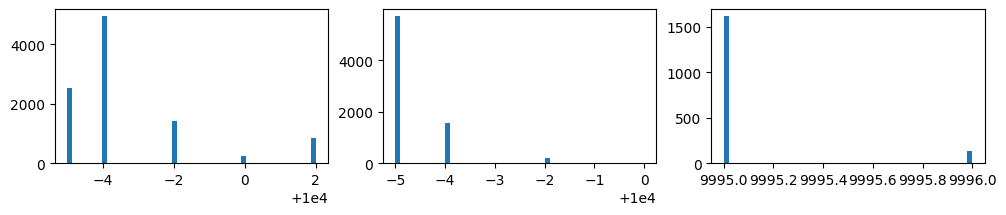

In [124]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))
ax[0].hist(pa1['bid_price_1'], bins=50)
ax[1].hist(pa1['bid_price_2'], bins=50)
ax[2].hist(pa1['bid_price_3'], bins=50)
plt.show()

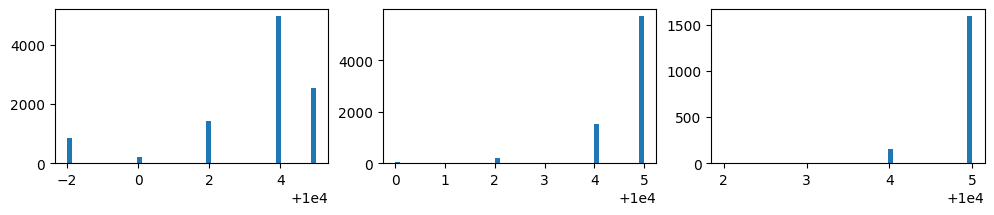

In [125]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))
ax[0].hist(pa1['ask_price_1'], bins=50)
ax[1].hist(pa1['ask_price_2'], bins=50)
ax[2].hist(pa1['ask_price_3'], bins=50)
plt.show()

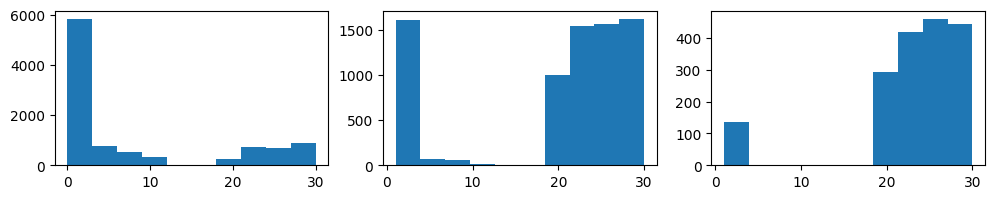

In [247]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))
ax[0].hist(pa1['bid_volume_1'], bins=10)
ax[1].hist(pa1['bid_volume_2'], bins=10)
ax[2].hist(pa1['bid_volume_3'], bins=10)
plt.show()

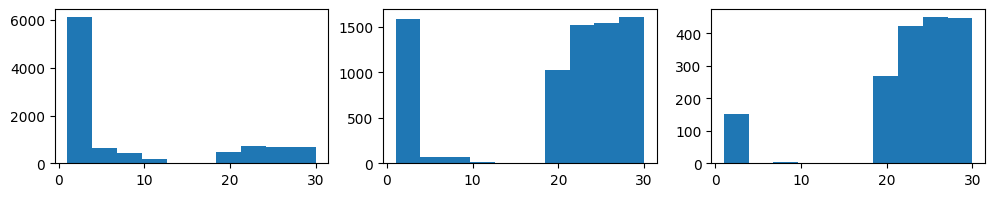

In [248]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))
ax[0].hist(pa1['ask_volume_1'], bins=10)
ax[1].hist(pa1['ask_volume_2'], bins=10)
ax[2].hist(pa1['ask_volume_3'], bins=10)
plt.show()

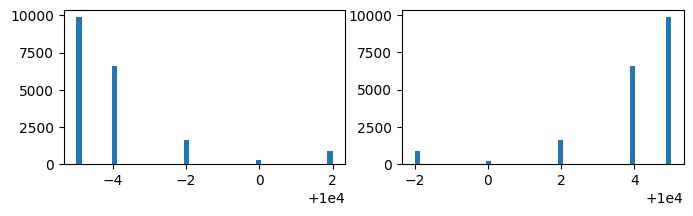

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(8, 2))
ax[0].hist(pd.concat([pa1['bid_price_1'], pa1['bid_price_2'], pa1['bid_price_3']]), bins=50)
ax[1].hist(pd.concat([pa1['ask_price_1'], pa1['ask_price_2'], pa1['ask_price_3']]), bins=50)
plt.show()

# STARFRUIT

In [254]:
ps1.isna().sum()

bid_price_1        0
bid_volume_1       0
bid_price_2     6223
bid_volume_2    6223
bid_price_3     9592
bid_volume_3    9592
ask_price_1        0
ask_volume_1       0
ask_price_2     6395
ask_volume_2    6395
ask_price_3     9482
ask_volume_3    9482
mid_price          0
dtype: int64

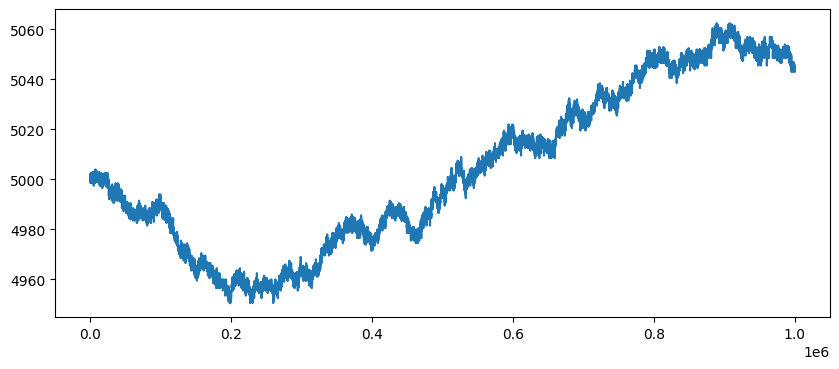

In [255]:
plt.figure(figsize=(10, 4))
plt.plot(ps1['mid_price'])
plt.show()